In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
def PCA(data, k):
    m, n = data.shape
    #将data的每一列的均值
    mean = np.array([np.mean(data[:,i]) for i in range(n)])
    #每列各元素减去这一列的均值
    norm_data = data - mean
    #求出协方差矩阵
    cov_matrix = norm_data.T.dot(norm_data)
    #求出特征值以及对应的特征向量
    eig_val, eig_vec = np.linalg.eig(cov_matrix)
    #转化为列表，列表元素为元组，key:特征值的绝对值，values:特征值对应的特征向量
    eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(n)]
    #从大到小进行排列
    eig_pairs.sort(reverse = True)
    #选择前k个特征向量
    feature = np.array([ele[1] for ele in eig_pairs[:k]])
    #得到降维后的数据 Y=PX
    new_data = norm_data.dot(feature.T)
    
    return new_data

In [3]:
iris = load_iris()
iris.data.shape

(150, 4)

In [4]:
new_data = PCA(iris.data, 2)

In [5]:
new_data

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451],
       [-2.28085963, -0.74133045],
       [-2.82053775,  0.08946138],
       [-2.62614497, -0.16338496],
       [-2.88638273,  0.57831175],
       [-2.6727558 ,  0.11377425],
       [-2.50694709, -0.6450689 ],
       [-2.61275523, -0.01472994],
       [-2.78610927,  0.235112  ],
       [-3.22380374,  0.51139459],
       [-2.64475039, -1.17876464],
       [-2.38603903, -1.33806233],
       [-2.62352788, -0.81067951],
       [-2.64829671, -0.31184914],
       [-2.19982032, -0.87283904],
       [-2.5879864 , -0.51356031],
       [-2.31025622, -0.39134594],
       [-2.54370523, -0.43299606],
       [-3.21593942, -0.13346807],
       [-2.30273318, -0.09870885],
       [-2.35575405,  0.03728186],
       [-2.50666891,  0.14601688],
       [-2.46882007, -0.13095149],
       [-2.56231991, -0.36771886],
       [-2.63953472,

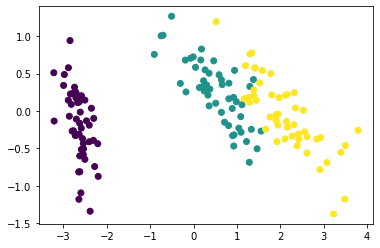

In [6]:
plt.scatter(new_data[:,0], new_data[:,1], c = iris.target)
plt.show()